# CAP 5610 Homework 3 

In [234]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import graphviz
from c45 import C45

## Task 3 - Question 1

In [245]:
# Create data

train_data = {'Home/Away': [1, 1, 0, 0, 1, 0], 
              'Top25': [0, 1, 0, 0, 0, 0], 
              'Media': ['NBC', 'NBC', 'ESPN', 'FOX', 'NBC', 'ABC'], 
              'Win/Lose': [1, 0, 1, 1, 1, 1]}

In [246]:
# Create dataframe

train = pd.DataFrame(train_data)
train.head()

,Home/Away,Top25,Media,Win/Lose
0,1,0,NBC,1
1,1,1,NBC,0
2,0,0,ESPN,1
3,0,0,FOX,1
4,1,0,NBC,1


In [247]:
# One hot encode

train = pd.get_dummies(train)
train.to_csv('train.csv', header=False)
X_train = train.drop('Win/Lose', axis=1, inplace=False)
Y_train = train['Win/Lose']

#### ID3 (entropy information gain)

In [146]:
# Create and fit ID3 decision tree

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

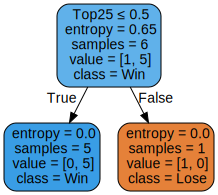

In [147]:
# Show tree

dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=['Lose', 'Win'],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### C4.5 (gain ratio)

In [250]:
model = C45('train.csv', 'desc1.txt')
model.fetchData()
model.preprocessData()
model.generateTree()
model.printTree()

Top25 <= 0.5 : 0
Top25 > 0.5 : 1


#### CART (GINI)  

In [148]:
# Create and fit CART decision tree

model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

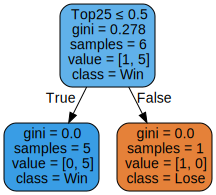

In [149]:
# Show tree

dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=['Lose', 'Win'],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Task 3 - Question 2

In [256]:
# Create data

train_data2 = {'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy',
                            'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 
                            'Sunny', 'Overcast', 'Overcast', 'Rainy'], 
              'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool',
                             'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild',
                             'Hot', 'Mild'], 
              'Humidity': [1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], 
              'Windy': [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1], 
              'Play?': [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]}

In [257]:
# Create dataframe

train2 = pd.DataFrame(train_data2)
train2.head()

,Outlook,Temperature,Humidity,Windy,Play?
0,Sunny,Hot,1,0,0
1,Sunny,Hot,1,1,0
2,Overcast,Hot,1,0,1
3,Rainy,Mild,1,0,1
4,Rainy,Cool,0,0,1


In [258]:
# One hot encode

train2 = pd.get_dummies(train2)
train2.to_csv('train2.csv', header=False)
X_train2 = train2.drop('Play?', axis=1, inplace=False)
Y_train2 = train2['Play?']

#### ID3 - (entropy information gain)

In [259]:
# Create and fit ID3 decision tree

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train2, Y_train2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

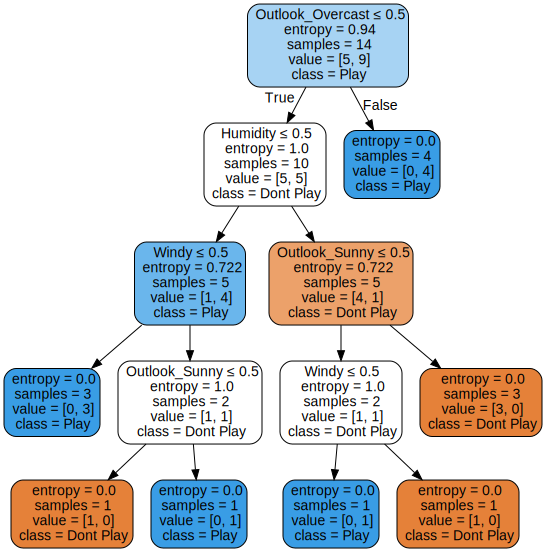

In [260]:
# Display tree

dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=X_train2.columns,  
                                class_names=['Dont Play', 'Play'],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### C4.5 (gain ratio)

In [261]:
model = C45('train2.csv', 'desc2.txt')
model.fetchData()
model.preprocessData()
model.generateTree()
model.printTree()

Temperature_Mild <= 0.5 : 
	Humidity <= 2.5 : 0
	Humidity > 2.5 : 
		Outlook_Sunny <= 0.5 : 1
		Outlook_Sunny > 0.5 : 
			Outlook_Overcast <= 0.5 : 0
			Outlook_Overcast > 0.5 : 1
Temperature_Mild > 0.5 : 0


#### CART (GINI)

In [157]:
# Create and train CART decision tree

model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train2, Y_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

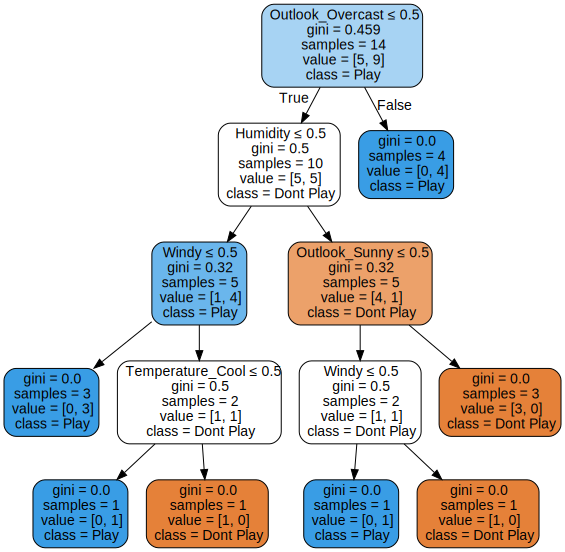

In [158]:
# Show tree

dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=X_train2.columns,  
                                class_names=['Dont Play', 'Play'],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Task 5

In [294]:
# Create data

train_data3 = {'Home/Away': [1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 
                             0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0], 
              'Top25': [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 
                        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1], 
              'Media': ['NBC', 'ABC', 'NBC', 'NBC', 'ABC', 'NBC', 
                        'NBC', 'ABC', 'ABC', 'NBC', 'NBC', 'FOX', 
                        'ABC', 'NBC', 'NBC', 'NBC', 'ESPN', 'ABC', 'NBC', 
                        'NBC', 'CBS', 'NBC', 'NBC', 'ABC'], 
              'Win/Lose': [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
                          1, 0, 0 , 1, 0, 1, 0, 0]}

In [295]:
# Create dataframe

train3 = pd.DataFrame(train_data3)
train3.head()

,Home/Away,Top25,Media,Win/Lose
0,1,0,NBC,1
1,0,0,ABC,1
2,1,1,NBC,1
3,1,0,NBC,1
4,0,1,ABC,0


In [296]:
# One hot encode

train3 = pd.get_dummies(train3)
train3.to_csv('train3.csv', header=False)
X_train3 = train3.drop('Win/Lose', axis=1, inplace=False)
Y_train3 = train3['Win/Lose']

In [297]:
# Creating test data

test_data = {'Home/Away': [1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0], 
              'Top25': [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], 
              'Media': ['NBC', 'NBC', 'ESPN', 'FOX', 'NBC', 'ABC', 
                        'NBC', 'NBC', 'NBC', 'ABC', 'NBC', 'ABC']}

test_labels = np.array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

test = pd.DataFrame(test_data)
test = pd.get_dummies(test)
test['Media_CBS'] = np.zeros_like(test['Media_FOX'])
test.head()

,Home/Away,Top25,Media_ABC,Media_ESPN,Media_FOX,Media_NBC,Media_CBS
0,1,0,0,0,0,1,0
1,1,1,0,0,0,1,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0


#### Question 1 - ID3 (information gain)

In [298]:
# Create and fit ID3 decision tree

model = model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train3, Y_train3)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

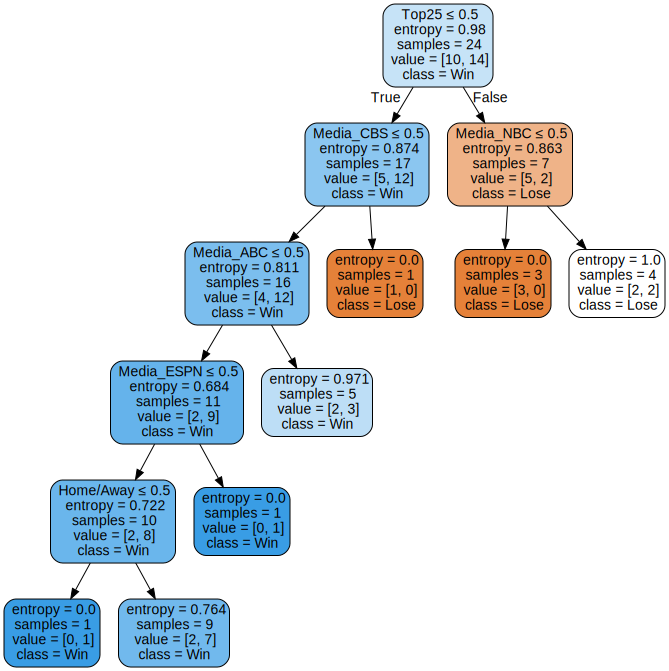

In [299]:
# Show tree

dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=X_train3.columns,  
                                class_names=['Lose', 'Win'],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [300]:
# Use model to make predictions on test set

preds = model.predict(test)
preds

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [301]:
# Calculate metrics

accuracy = np.sum(test_labels == preds) / len(preds)
precision = metrics.precision_score(test_labels, preds)
recall = metrics.recall_score(test_labels, preds)
f1 = (2 * (precision * recall)) / (precision + recall)

In [302]:
print('Accuracy: {}%'.format(np.round(acc * 100, 2)))
print('Precision: {}%'.format(np.round(precision * 100, 2)))
print('Recall: {}%'.format(np.round(recall * 100, 2)))
print('F1 Score: {}%'.format(np.round(f1 * 100, 2)))

Accuracy: 83.33%
Precision: 100.0%
Recall: 77.78%
F1 Score: 87.5%


#### Question 2 - C4.5 (gain ratio)

In [303]:
model = C45('train3.csv', 'desc3.txt')
model.fetchData()
model.preprocessData()
model.generateTree()
model.printTree()

Media_FOX <= 0.5 : 
	Media_CBS <= 0.5 : 
		Media_NBC <= 0.5 : 
			Top25 <= 0.5 : 
				Media_ESPN <= 0.5 : 0
				Media_ESPN > 0.5 : 1
			Top25 > 0.5 : 1
		Media_NBC > 0.5 : 0
	Media_CBS > 0.5 : 0
Media_FOX > 0.5 : 0


In [304]:
preds = [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]
preds

[0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]

In [305]:
# Calculate metrics

accuracy = np.sum(test_labels == preds) / len(preds)
precision = metrics.precision_score(test_labels, preds)
recall = metrics.recall_score(test_labels, preds)
f1 = (2 * (precision * recall)) / (precision + recall)

In [306]:
print('Accuracy: {}%'.format(np.round(acc * 100, 2)))
print('Precision: {}%'.format(np.round(precision * 100, 2)))
print('Recall: {}%'.format(np.round(recall * 100, 2)))
print('F1 Score: {}%'.format(np.round(f1 * 100, 2)))

Accuracy: 83.33%
Precision: 50.0%
Recall: 22.22%
F1 Score: 30.77%
